In [ ]:

#importar libreria que vamos a usar para leer archivo y manipular
import pandas as pd #manipulacion de datos
import matplotlib.pyplot as plt  #permite controlar el tamaño del grafico, etiquetas ,eyendas etc
import seaborn as sns  #para crear graficos

#cargar archivos csv
ventas = pd.read_csv("sales_data_2023.csv")
clientes = pd.read_csv("customer_data_2023.csv")

#Mostrar las primeras 6 filas para verfiicar que estan bien leidos los archivos csv y analisis rapido
print("Ventas: ")
print(ventas.head())
print("Clientes: ")
print(clientes.head())


Ventas: 
   Sale_ID  Customer_ID  Sale_Amount   Sale_Date Geography
0        1           38        31.11  2023-05-03      West
1        2           18       191.54  2023-03-06     South
2        3          197       283.74  2023-06-23      East
3        4          185       367.13  2023-02-09     South
4        5          171       188.52  2023-12-25     South
Clientes: 
   Customer_ID Customer_Name  Customer_Age Geography
0            1    Customer_1            20      West
1            2    Customer_2            69     North
2            3    Customer_3            57      West
3            4    Customer_4            66      East
4            5    Customer_5            59     South


para los tipos de datos que usa panda los tipos de datos son

*object = cadenas de texto (equivalente a string)
*int64 = identificadores numericos que no se usan para calculos solo se reresentan como numeros enteros
*float64 = es una cantidad monetaria y puede tener decimales
*las fechas se deben de representar como datetime

In [8]:
#INCISO A
#verificar integrida y consistencia 

#verificar nombres de las columnas
print("columnas de ventas:")
print(ventas.columns)
print(" ")
print("columnas de clientes:")
print(clientes.columns)
print(" ")

#verificar tipos de datos
print("Tipo de datos de ventas: ")
print(ventas.dtypes)
print(" ")
print("Tipo de datos de clientes: ")
print(clientes.dtypes)
print(" ")

#verificar si hay valores nulos
print("Valores null en tabla de ventas ")
print(ventas.isnull().sum())
print(" ")
print("Valores null en tabla clientes ")
print(clientes.isnull().sum())


columnas de ventas:
Index(['Sale_ID', 'Customer_ID', 'Sale_Amount', 'Sale_Date', 'Geography'], dtype='object')
 
columnas de clientes:
Index(['Customer_ID', 'Customer_Name', 'Customer_Age', 'Geography'], dtype='object')
 
Tipo de datos de ventas: 
Sale_ID          int64
Customer_ID      int64
Sale_Amount    float64
Sale_Date       object
Geography       object
dtype: object
 
Tipo de datos de clientes: 
Customer_ID       int64
Customer_Name    object
Customer_Age      int64
Geography        object
dtype: object
 
Valores null en tabla de ventas 
Sale_ID        0
Customer_ID    0
Sale_Amount    0
Sale_Date      0
Geography      0
dtype: int64
 
Valores null en tabla clientes 
Customer_ID      0
Customer_Name    0
Customer_Age     0
Geography        0
dtype: int64


In [9]:
#INCISO B
#Conversion de tipos de datos incorrectos en columna fecha
#conversion de tipo de dato object a datatime

ventas["Sale_Date"]= pd.to_datetime(ventas["Sale_Date"])

#verificacion que el tipo de dato es correcto
print(ventas.dtypes)

Sale_ID                 int64
Customer_ID             int64
Sale_Amount           float64
Sale_Date      datetime64[ns]
Geography              object
dtype: object


Realizar una busqueda para los valores atipicos que por lo general se dan en rangos de edad y montos de ventas muy elevados
haremos la verificacion tambien en las fechas de compra para verificar bien el formato de datos

In [10]:
#busqueda de valores atipicos la funcion describe() proporciona informacion commo min, max, media donde podemos ver valores atipicos

print("Resumen de Importe de ventas")
print(ventas["Sale_Amount"].describe())
print(" ")
print("Resumen de edad de cliente")
print(clientes["Customer_Age"].describe())
print(" ")
print("Resumen de fecha de venta")
print(ventas["Sale_Date"].describe())
print(" tipo de datos")
print(ventas.dtypes)

Resumen de Importe de ventas
count    1000.000000
mean      253.532920
std       142.291244
min        10.510000
25%       124.297500
50%       258.190000
75%       373.130000
max       500.740000
Name: Sale_Amount, dtype: float64
 
Resumen de edad de cliente
count    300.000000
mean      42.210000
std       14.535134
min       18.000000
25%       30.000000
50%       42.000000
75%       54.000000
max       69.000000
Name: Customer_Age, dtype: float64
 
Resumen de fecha de venta
count                          1000
mean     2023-06-29 04:01:55.200000
min             2023-01-01 00:00:00
25%             2023-03-26 00:00:00
50%             2023-06-26 00:00:00
75%             2023-09-25 06:00:00
max             2023-12-31 00:00:00
Name: Sale_Date, dtype: object
 tipo de datos
Sale_ID                 int64
Customer_ID             int64
Sale_Amount           float64
Sale_Date      datetime64[ns]
Geography              object
dtype: object


In [11]:
#Detectar si hay registros duplicados en ventas y en clientes
duplicados_ventas = ventas.duplicated().sum()
print(f"duplicados en ventas: {duplicados_ventas}")
print(" ")

duplicados_clientes = clientes.duplicated().sum()
print(f"Duplicados en clientes: {duplicados_clientes}")


duplicados en ventas: 0
 
Duplicados en clientes: 0


como no hay duplicados en ventas, no rellenaremos ni eliminaremos valores faltantes

metodos para rellenar espacios faltates

*con la media
ventas ["Sale_Amount"] = ventas["Sale_Amount"].fillna(["Sale_Amount"].mean())

*con un valor desconocido
clientes["Geography"]= clientes["Geography"].fillna("Desconocido)

*eliminar valores si son pocos y no importantes
ventas = ventas.dropna()
clientes= clientes.dropna()

In [ ]:
#INCISO C
#relizar union de los dataframe (df_completo) para poder gaficar las ventas mensuales
#realizamos la union de los dos datas frame conservando todos los registros de ventas y solo los de la izquierda que sean coincidientes
#con Customer_ID
df_completo =pd.merge(ventas,clientes, on="Customer_ID", how="left")

#eliminar columna geography x si existe
if "Geography_x" in df_completo.columns:
    df_completo.drop(columns=["Geography_x"], inplace=True)

#renonmbrar Geografy_y
if "Geography_y" in df_completo.columns:
    df_completo.rename(columns={"Geography_y": "Geography"},inplace=True)

print(df_completo.columns)

#crear una columna por mes
df_completo["Mes"] = df_completo["Sale_Date"].dt.to_period("M")



Index(['Sale_ID', 'Customer_ID', 'Sale_Amount', 'Sale_Date', 'Customer_Name',
       'Customer_Age', 'Geography'],
      dtype='object')


In [22]:
#verificar el nombre de las columnas para que no haya errores
print("Columnas disponibles")
print(df_completo.columns)

Columnas disponibles
Index(['Sale_ID', 'Customer_ID', 'Sale_Amount', 'Sale_Date', 'Customer_Name',
       'Customer_Age', 'Geography', 'Mes'],
      dtype='object')


In [ ]:
#agrupar ventas mensulaes por region
ventas_por_region = df_completo.groupby(["Mes","Geography"])["Sale_Amount"].sum().reset_index()

#mostrar tabla del resumen
print(" ")
print("Ventas mensuales por region: ")
print(ventas_por_region.head()) #visualizamos el dataframe para ver si es correcto y poder graficar


 
Ventas mensuales por region: 
       Mes Geography  Sale_Amount
0  2023-01      East      6857.75
1  2023-01     North      2757.83
2  2023-01     South      4834.22
3  2023-01      West      5756.37
4  2023-02      East      4893.10


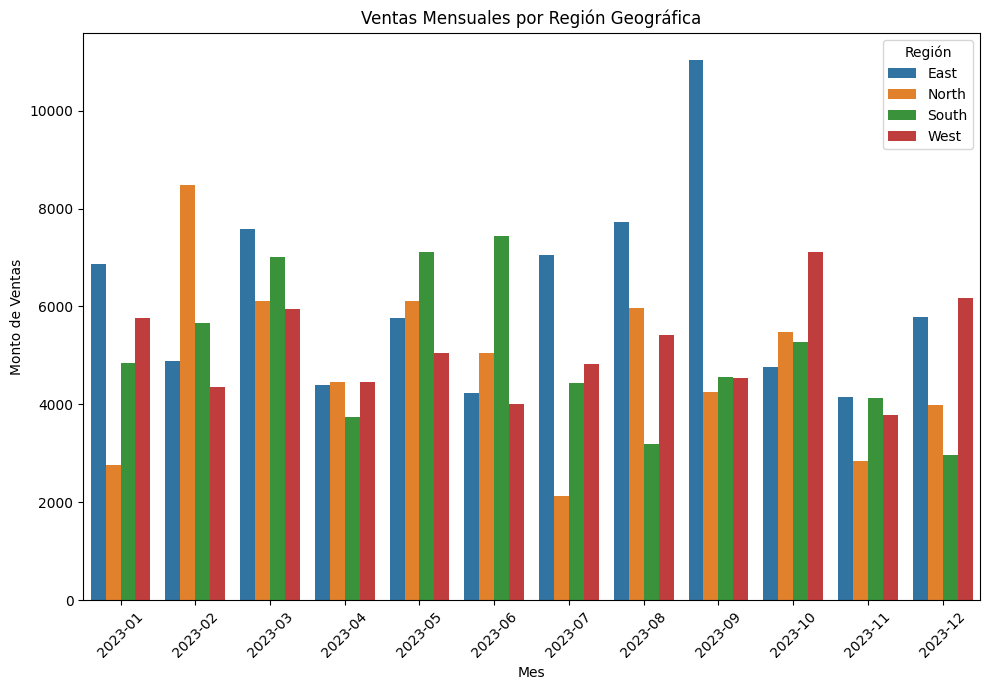

In [ ]:
#visualizar la grafica

plt.figure(figsize=(10, 7)) #configura el tamaño del grafico de barra en pulgadas
sns.barplot(data=ventas_por_region, x='Mes', y='Sale_Amount', hue='Geography') #crea un grafico de barras, hue crea una barr por region

plt.title('Ventas Mensuales por Región Geográfica') #titulo del grafico
plt.xlabel('Mes') #titulo del eje x
plt.ylabel('Monto de Ventas') #titulo del eje y
plt.xticks(rotation=45) #rotacion de etiquetas mensuales para que no se encimen
plt.legend(title='Región') #se asigna la leyenda de los indicadores de colores
plt.tight_layout() #ajuste del diseño automatico para evitar que se corte el grafico
plt.show()